# 22/01/2024 Trading projection analysis, Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("fivethirtyeight")
plt.style.use("bmh")

In [2]:
pd.read_excel("Timeline_2023.xlsx") # reading the excel file with my trading results 2023

,jan 1-6,jan 8-13,jan 15-20,jan 22-27,Jan-Febr 29-3,Feb 5-10,Feb 12-17,Feb 19-24,Feb-March 26-3,March 5-10,...,Oct 22-27,Oct-Nov 29-3,Nov 5-10,Nov 12-17,Nov 19-24,Nov-Dec 26-1,Dec 3-8,Dec 10-15,Dec 17-22,Dec 24-29
0,-0.38,-2.65,-0.12,1.76,3.88,2.82,4.29,3.61,-3.97,1.24,...,2,0.35,2,-2.42,-2.94,2.1,-5.46,2.06,2.6,2.01


In [3]:
timeline_2023 = pd.read_excel("Timeline_2023.xlsx")

In [4]:
timeline_2023 = timeline_2023.T

In [5]:
timeline_2023 = timeline_2023.rename(columns = {0 : "results_week_percentage"})

In [6]:
timeline_2023.head()

,results_week_percentage
jan 1-6,-0.38
jan 8-13,-2.65
jan 15-20,-0.12
jan 22-27,1.76
Jan-Febr 29-3,3.88


**This time I am going to apply a linear regression analysis based on the beheviour I have developed the last trymester of the previous year 2023, What are my expected results over the time applying statistical concepts and probability theory in the risk management in the stock market?** 

In [7]:
population_2023 = timeline_2023.loc["Sep 17-22": , :] # we are going to grab the data since September

In [8]:
population_2023

,results_week_percentage
Sep 17-22,2.00
Sep 24-29,2.00
Oct 1-6,2.00
Oct 8-13,2.00
Oct 15-20,-0.37
Oct 22-27,2.00
Oct-Nov 29-3,0.35
Nov 5-10,2.00
Nov 12-17,-2.42
Nov 19-24,-2.94


In [9]:
len(population_2023) # we have 15 observations

15

In [10]:
weeks = []
for i in range(1, 16):
    weeks.append(i)

In [11]:
population_2023.index = weeks # Reindexing the weeks in numbers instead of a label date

In [12]:
population_2023

,results_week_percentage
1,2.00
2,2.00
3,2.00
4,2.00
5,-0.37
6,2.00
7,0.35
8,2.00
9,-2.42
10,-2.94


Let's plot a scatterplot to see the relationship between these two variables, time and results, two variables in the same time into account. 

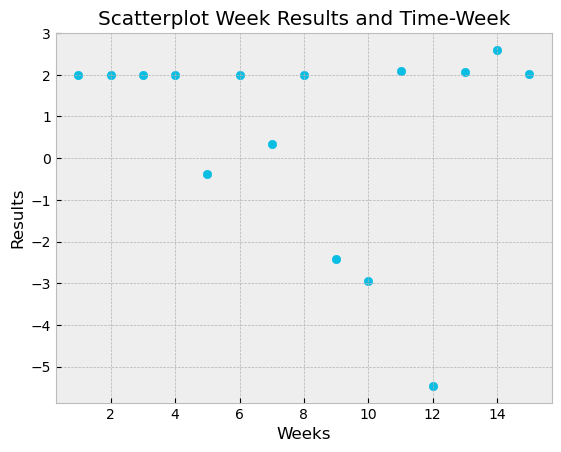

In [13]:
plt.scatter(population_2023.index, population_2023["results_week_percentage"], color = "#0abde3")
plt.title("Scatterplot Week Results and Time-Week")
plt.xlabel("Weeks")
plt.ylabel("Results")
plt.show()

We barely see a trend here, there is not relationship between these two variables, but what if we take the acummulative frecuency over the time? The accumulative frequency is the progressive sum of each value over time.

In [14]:
import itertools

In [15]:
list(itertools.accumulate(population_2023["results_week_percentage"])) 

[2.0,
 4.0,
 6.0,
 8.0,
 7.63,
 9.629999999999999,
 9.979999999999999,
 11.979999999999999,
 9.559999999999999,
 6.619999999999999,
 8.719999999999999,
 3.259999999999999,
 5.3199999999999985,
 7.919999999999998,
 9.929999999999998]

In [16]:
sum(list(itertools.accumulate(population_2023["results_week_percentage"]))) # this is the cumulative sum.

110.54999999999998

In [17]:
week_results = list(itertools.accumulate(population_2023["results_week_percentage"]))

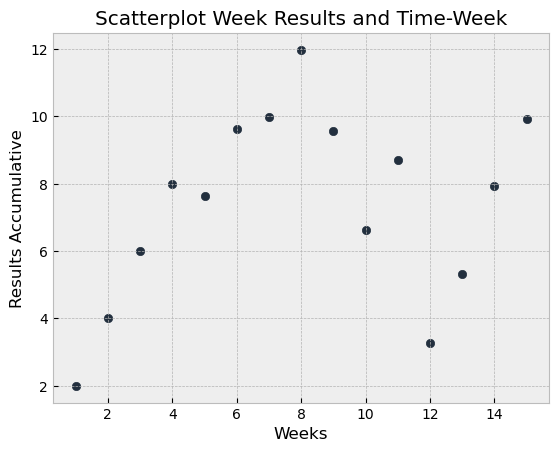

In [18]:
plt.scatter(population_2023.index, week_results, color = "#222f3e")
plt.title("Scatterplot Week Results and Time-Week")
plt.xlabel("Weeks")
plt.ylabel("Results Accumulative")
plt.show()

Can we model a straight line to estimate an expected value over time? 

In [19]:
trymester = pd.DataFrame({"Weeks": population_2023.index, "Results Accumulative": week_results})

**But first let's calculate the correlation coefficient and then the coefficient of determination**

In [20]:
trymester.corr()["Weeks"]["Results Accumulative"] 
# The correlation between these two variables is weak but it is still positive.

0.3036888582069623

In [21]:
trymester.corr()["Weeks"]["Results Accumulative"] ** 2
# We have 9% of explanation for the Y variable from the X variable with this dataset.

0.09222692259904844

Do we have some outliers? on the y axis? the accumulative frequency? 

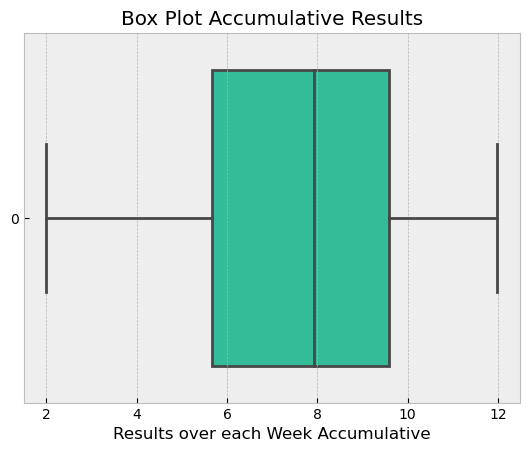

In [22]:
sns.boxplot(trymester["Results Accumulative"], orient = "h", color = "#1dd1a1")
plt.title("Box Plot Accumulative Results")
plt.xlabel("Results over each Week Accumulative")
plt.show()

In [23]:
trymester["Results Accumulative"].describe()

count    15.000000
mean      7.370000
std       2.813727
min       2.000000
25%       5.660000
50%       7.920000
75%       9.595000
max      11.980000
Name: Results Accumulative, dtype: float64

In [24]:
Q1 = trymester["Results Accumulative"].describe().loc["25%"]
Q3 = trymester["Results Accumulative"].describe().loc["75%"]
IQR = Q3 - Q1
IQR

3.9349999999999996

According to the standard rule to identify outliers: We need to see if the data points are 1.5 away from the IQR (interquartile range) in order to identify outliers.

In [25]:
Q3 + (1.5 * IQR)

15.497499999999999

In [26]:
Q1 - (1.5 * IQR)

-0.2425000000000006

**We dont have outliers regarding the mean of the results accumulated, however, if we want to model a regression line we can consider a few outliers.**

In [27]:
trymester["Results Accumulative"]

0      2.00
1      4.00
2      6.00
3      8.00
4      7.63
5      9.63
6      9.98
7     11.98
8      9.56
9      6.62
10     8.72
11     3.26
12     5.32
13     7.92
14     9.93
Name: Results Accumulative, dtype: float64

In [28]:
outliers_y = [trymester["Results Accumulative"][9], trymester["Results Accumulative"][11]
              , trymester["Results Accumulative"][12]]
outliers_y # We are goiing to consider and remove these three outliers

[6.619999999999999, 3.259999999999999, 5.3199999999999985]

In [29]:
outliers_x = [trymester["Weeks"][9], trymester["Weeks"][11]
              , trymester["Weeks"][12]]
outliers_x

[10, 12, 13]

# Scatter Plot with outliers

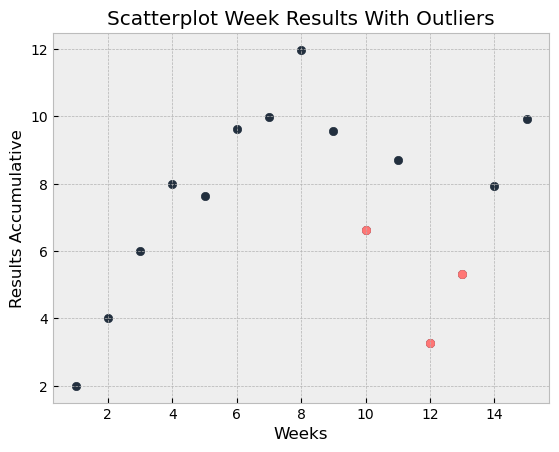

In [30]:
plt.scatter(trymester["Weeks"], trymester["Results Accumulative"], color = "#222f3e")
plt.scatter(outliers_x, outliers_y, color = "#ff7675")
plt.title("Scatterplot Week Results With Outliers")
plt.xlabel("Weeks")
plt.ylabel("Results Accumulative")
plt.show()

We have a possitive correlation but it is weak, very close to 0, in fact, to describe this scatterplot:

1. Form: the form of the data is not exactly linear, it is more like a curve
2. Direction: Certantly it is possitive
3. Strenght: Weak, very weak
4. Outliers: We can consider three of them

# Linear Regression Model

**We are going to plot the regression line, but first we need to find the slope and interception of this straight line, first with the complete data, and then with the data without outliers.**

In [31]:
x = trymester["Weeks"]
y = trymester["Results Accumulative"]

In [32]:
len(x)

15

In [33]:
len(y)

15

In [34]:
trymester["Sum"] = x * y

In [35]:
x_squared = x ** 2

**Let's calculate beta, the coeficient of the independent variable x, the Slope**

In [36]:
x_squared.sum()

1240

In [37]:
x.sum() ** 2

14400

# $ b = \frac{n \sum xy \enspace-\enspace \sum x  \sum y} {n \sum x^2 \enspace-\enspace (\sum x)^2}$ 

**The above formula to calculate beta based on the data provided** 

In [38]:
b = ( ( 15 * trymester["Sum"].sum() ) - ( x.sum() * y.sum() ) ) / ( ( 15 * x_squared.sum() ) - ( x.sum() ** 2 ) )
b

0.19107142857142814

**Now it is time to calculate alpha, the interception**

# $a = \frac{\sum y \enspace-\enspace b \sum x} {n}$

**The above formula to calculate alpha based on the data provided** 

In [39]:
a = ( y.sum() - ( b * x.sum() ) ) / 15
a

5.841428571428575

**We are going to plot the line**

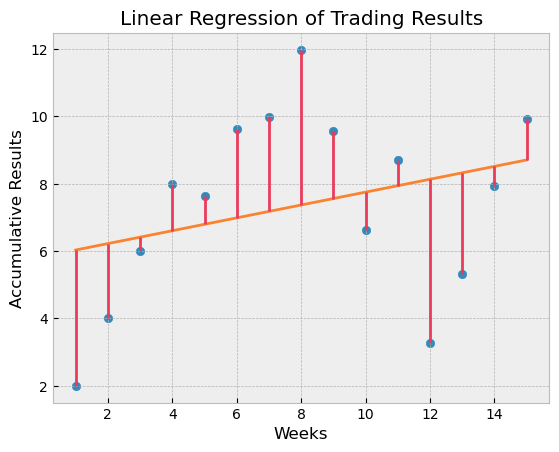

In [40]:
alpha = a
beta = b
predictions = ( beta * x ) + alpha

fig,ax = plt.subplots()
ax.scatter(x, y) # plotting the scatterplot
ax.plot(x, predictions, color ="#fa8231") # plotting the line
ax.vlines(x, y, predictions, color='#eb3b5a')
ax.set(
    xlabel="Weeks",
    ylabel="Accumulative Results",
    title = "Linear Regression of Trading Results"
)
plt.show()

So according to this data what will be my week result of the 4th, 8th, 12th and 24th week? in terms of percentage 

In [41]:
(beta * 4) + alpha

6.605714285714288

In [42]:
(beta * 8) + alpha

7.37

In [43]:
(beta * 12) + alpha

8.134285714285713

In [44]:
(beta * 24) + alpha

10.42714285714285

In [45]:
with_outliers = []
for observation in range(96):
    observation = round( ( beta * observation ), 2 ) + alpha
    with_outliers.append(observation)

**What is the root mean square of the residuals?**

In [46]:
e = y - predictions
e_squared = e ** 2
mean_squared_e = e_squared.sum() / 15

In [47]:
RMSE = np.sqrt(mean_squared_e)
RMSE

2.5899353733433657

**Residual plot**

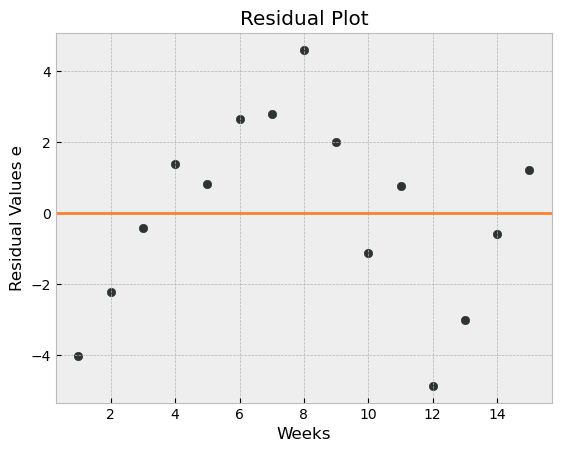

In [48]:
fig,ax = plt.subplots()
ax.scatter(x, e, color = "#2d3436")
ax.axhline(np.mean(e), color ="#fa8231")
ax.set(
    xlabel="Weeks",
    ylabel="Residual Values e",
    title = "Residual Plot"
)
plt.show()

If the scatter plot of the residuals (x, e) is not random, if it follows a u shaped parabolic pattern, then a linear regression model will not be a good fit for the data, the mean of the residuals is always 0, and the sum of the residuals too. 

In this case we can see some kind  of curve, but let's see what happens when we remove some outliers.

# Regression without outliers

In [49]:
trymester

,Weeks,Results Accumulative,Sum
0,1,2.00,2.00
1,2,4.00,8.00
2,3,6.00,18.00
3,4,8.00,32.00
4,5,7.63,38.15
5,6,9.63,57.78
6,7,9.98,69.86
7,8,11.98,95.84
8,9,9.56,86.04
9,10,6.62,66.20


In [50]:
trymester = trymester.drop(index = [9, 11, 12]) # removing 3 outliers

**let's calculate the correlation coefficient and then the coefficient of determination without outliers**

In [51]:
trymester.corr()["Weeks"]["Results Accumulative"] 
# The correlation coefficient improved by a 0.3 extra, it is more positive, stronger without outliers
# We can considerate a moderate positive correlation between Weeks and Results accumulated without outliers. 

0.6358643042775919

In [52]:
trymester.corr()["Weeks"]["Results Accumulative"] ** 2
# 40% of the Y values are explained by the X values, this is a considerable improvement
# With those 3 outliers the dataset had an r squared of 0.09

0.40432341345442596

**Let's calculate beta, the coeficient of the independent variable, the Slope in this new dataset without outliers**

In [53]:
x = trymester["Weeks"]
y = trymester["Results Accumulative"]

In [54]:
len(x)

12

In [55]:
len(y)

12

In [56]:
trymester["Sum"] = x * y

In [57]:
x_squared = x ** 2

In [58]:
x_squared.sum()

827

In [59]:
x.sum() ** 2

7225

**Finding beta, the slope**

In [60]:
b = ( ( 12 * trymester["Sum"].sum() ) - ( x.sum() * y.sum() ) ) / ( ( 12 * x_squared.sum() ) - ( x.sum() ** 2 ) )
b

0.39136346795109234

**Finding alpha, the interception**

In [61]:
a = ( y.sum() - ( b * x.sum() ) ) / 12
a

5.173675435346429

Plotting the regression line **without outliers**

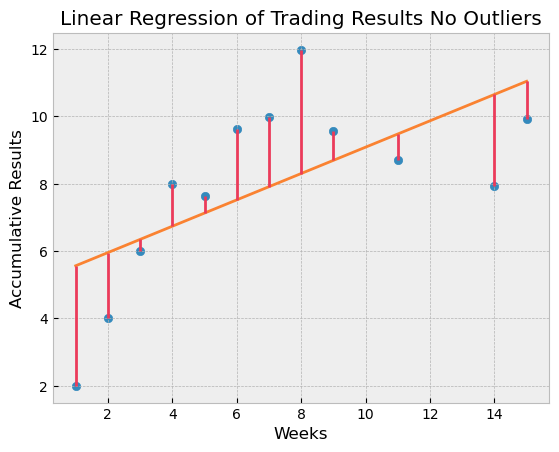

In [62]:
alpha = a
beta = b
predictions = ( beta * x ) + alpha

fig,ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, predictions, color ="#fa8231")
ax.vlines(x, y, predictions, color='#eb3b5a')
ax.set(
    xlabel="Weeks",
    ylabel="Accumulative Results",
    title = "Linear Regression of Trading Results No Outliers"
)
plt.show()

So according to this dataset **without outliers** what will be my week result of the 4th, 8th, 12th and 24th week? in terms of percentage 

In [63]:
(beta * 4) + alpha

6.739129307150799

In [64]:
(beta * 8) + alpha

8.304583178955168

In [65]:
(beta * 12) + alpha

9.870037050759539

In [66]:
(beta * 24) + alpha

14.566398666172645

In [67]:
without_outliers = []
for observation in range(96):
    observation = round( ( beta * observation ), 2 ) + alpha
    without_outliers.append(observation)

**What is the root mean square of the residuals? without outliers**

In [68]:
e = y - predictions
e_squared = e ** 2
mean_squared_e = e_squared.sum() / 12

In [69]:
RMSE = np.sqrt(mean_squared_e)
RMSE # the previous one was 2.58, with outliers

2.056559597493165

**Residual plot without outliers**

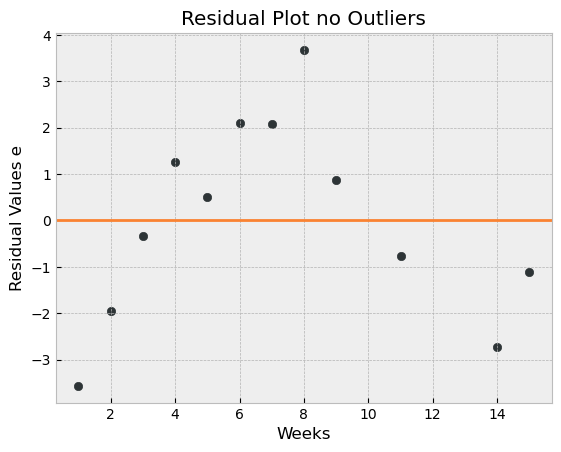

In [70]:
fig,ax = plt.subplots()
ax.scatter(x, e, color = "#2d3436")
ax.axhline(np.mean(e), color ="#fa8231")
ax.set(
    xlabel="Weeks",
    ylabel="Residual Values e",
    title = "Residual Plot no Outliers"
)
plt.show()

I can see a U shaped pattern here, maybe a linear regression model is not the best model to fit this data of stock market results, however, we have a correlation coefficient which is positive or positive moderated.

In [71]:
estimations_weekly = pd.DataFrame({"Outliers": with_outliers, "No Outliers": without_outliers})

In [72]:
estimations_weekly.to_csv("Projection Stock Market Returns Weekly.csv") # saving estimations Weekly

# Visualizing the two functions of linear Regression one with outliers and the other with no outliers 25/03/2024

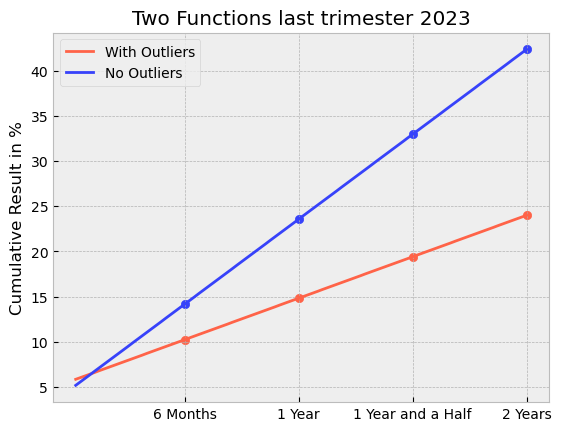

In [73]:
plt.plot(estimations_weekly.index, estimations_weekly["Outliers"], color = "#ff6348", label = "With Outliers")
plt.plot(estimations_weekly.index, estimations_weekly["No Outliers"], color = "#3742fa", label = "No Outliers")
plt.title("Two Functions last trimester 2023")
#plt.xlabel("Week")
plt.ylabel("Cumulative Result in %")

# Placing the ordered pairs
for ordered_pair in [23, 47, 71, 95]:

    x = estimations_weekly.index[ordered_pair]

    y_with = round(estimations_weekly.loc[ordered_pair, "Outliers"], 2)
    y_no = round(estimations_weekly.loc[ordered_pair, "No Outliers"], 2)

    plt.scatter(x, y_with, color = "#ff6348")
    plt.scatter(x, y_no, color = "#3742fa")


plt.xticks(ticks = [23, 47, 71, 95], labels = ["6 Months", "1 Year", "1 Year and a Half", "2 Years"])

plt.legend()
plt.show()

# In a normal distribution:

+ 68% of the data falls in 1 standard deviation
+ 95% of the data falls in 2 standard deviations
+ 99.7% of the data falls in 3 standard deviations

However, here we are considering a residual sum of squares taking its root to see how much the spread of the data can be, and we saw that with outliers we have **2.58** and without outliers **2.06** residual sum of squares, and we can have 1, 2, 3 of these. While we have less outliers the more tigthly clustered the data can be to the mean **(the function of linear regression)** and the more we are going to earn long term. 